# Animation

## Animated Counter

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [23]:
from IPython.core.display import HTML, display

fig, ax = plt.subplots()

# option 2: create outside
counter_text = ax.text(0.5, 0.5, "TODO", size=64, va="center", ha="center")

def draw_frame(frame_num):
    #print(frame_num)
    # option 1: clear axes subplot
    #ax.cla()
    #ax.text(0.5, 0.5, frame_num, size=64, va="center", ha="center")

    # option 2: update each time
    counter_text.set_text(frame_num)

#draw_frame(4)
anim = FuncAnimation(fig, draw_frame, frames=10, interval=1000)
vid_html = anim.to_html5_video()
plt.close(fig)

#with open("myvid.html", "w") as f:
#    f.write(vid_html)

HTML(vid_html)

## 2. animated rolling red ball on a black platform

In [36]:
fig, ax = plt.subplots()
ax.set_aspect(1)

# add patches
circ = plt.Circle((0, 0.5), 0.1, color="red")
ax.add_artist(circ)

platform = plt.Rectangle((0, 0.3), 1, 0.1, color="black")
ax.add_artist(platform)

def draw_frame(frame_num):
    x = 0.1 * frame_num
    circ.center = (x, 0.5)

#draw_frame(9)
anim = FuncAnimation(fig, draw_frame, frames=10, interval=100)
vid_html = anim.to_html5_video()
plt.close(fig)

HTML(vid_html)

## 3. Frames Per Second (fps)

In [38]:
fig, ax = plt.subplots()
ax.set_aspect(1)

# add patches
circ = plt.Circle((0, 0.5), 0.1, color="red")
ax.add_artist(circ)

platform = plt.Rectangle((0, 0.3), 1, 0.1, color="black")
ax.add_artist(platform)

# IMPORTANT VARIABLES OF ANIMATION
fps = 30
seconds = 5
frames = fps * seconds
interval = 1/fps*1000

def draw_frame(frame_num):
    percent = frame_num / frames # how much of the video being shown is complete

    width = 1
    x = width * percent
    circ.center = (x, 0.5)
    
anim = FuncAnimation(fig, draw_frame, frames=frames, interval=interval)
vid_html = anim.to_html5_video()
plt.close(fig)

HTML(vid_html)

## 4. Animated View of Fire Department Incidents

In [39]:
import pandas as pd
import geopandas as gpd
import requests, re

background = gpd.read_file("https://opendata.arcgis.com/datasets/db89adb17d414649a71c0f29ea73e5bf_6.geojson")

# part 1: fetch page
url = "https://www.cityofmadison.com/fire/daily-reports"
resp = requests.get(url)
resp.raise_for_status()

In [40]:
print(resp.text)

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="Generator" content="Drupal 7 (http://drupal.org)" />
<link rel="canonical" href="/fire/daily-reports" />
<link rel="shortlink" href="/node/31440" />
<meta about="/fire" typeof="skos:Concept" property="rdfs:label skos:prefLabel" content="Fire" />
<link rel="shortcut icon" href="https://www.cityofmadison.com/sites/default/files/template/favicon.ico" type="image/vnd.microsoft.icon" />
    <

In [48]:
# part 2: extract dates
dates = re.findall(r"\d{2}/\d{2}/\d{4}", resp.text)
dates = pd.to_datetime(dates)
dates

DatetimeIndex(['2022-03-29', '2022-03-28', '2022-03-26', '2022-03-26',
               '2022-03-20', '2022-03-15', '2022-03-14', '2022-03-13',
               '2022-03-10', '2022-03-03'],
              dtype='datetime64[ns]', freq=None)

In [53]:
days = (dates - dates.min()) / pd.Timedelta(days=1)
days

Float64Index([26.0, 25.0, 23.0, 23.0, 17.0, 12.0, 11.0, 10.0, 7.0, 0.0], dtype='float64')

In [60]:
# part 3: extract addresses
addresses = re.findall(r'<span itemprop="streetAddress">(.*?)</span>', resp.text)[:-1]
addresses

['3200 Dairy Drive',
 '2100 East Springs Drive',
 '2300 block Cypress Way',
 '3700 block Commercial Avenue',
 '1400 block Williamson Street',
 '5400 block Raymond Road',
 '300 block N. Sixth Street',
 '400 block N. Park Street',
 '6000 block Driscoll Drive',
 '7000 block Tree Lane']

In [65]:
addresses = [addr.replace(" block ", " ") + "; Madison, WI" for addr in addresses]
addresses

['3200 Dairy Drive; Madison, WI',
 '2100 East Springs Drive; Madison, WI',
 '2300 Cypress Way; Madison, WI',
 '3700 Commercial Avenue; Madison, WI',
 '1400 Williamson Street; Madison, WI',
 '5400 Raymond Road; Madison, WI',
 '300 N. Sixth Street; Madison, WI',
 '400 N. Park Street; Madison, WI',
 '6000 Driscoll Drive; Madison, WI',
 '7000 Tree Lane; Madison, WI']

In [64]:
# part 4: geocoding (addresses => lat/lon)
#Bing, Google Maps, OpenStreetsMaps (nominatim)

gpd.tools.geocode('3200 Dairy Drive; Madison, WI').iloc[0]["address"]

'Dairy Drive, 53716, Madison, Wisconsin, United States'

In [68]:
df = gpd.tools.geocode(addresses, provider="nominatim", user_agent="cs320")
df

,geometry,address
0,POINT (-89.29605 43.05013),"Dairy Drive, Madison, Dane County, Wisconsin, ..."
1,POINT (-89.29678 43.12592),"2100, East Springs Drive, Madison, Dane County..."
2,POINT (-89.39734 43.04158),"2300, Cypress Way, Burr Oaks, Madison, Town of..."
3,POINT (-89.31781 43.10962),"3700, Commercial Avenue, Madison, Dane County,..."
4,POINT (-89.36074 43.08592),"1400, Williamson Street, Marquette, Madison, D..."
5,POINT (-89.47174 43.03194),"5400, Raymond Road, Madison, Dane County, Wisc..."
6,GEOMETRYCOLLECTION EMPTY,None
7,POINT (-89.40072 43.07339),"400, North Park Street, State-Langdon, Madison..."
8,POINT (-89.27963 43.09860),"6000, Driscoll Drive, McClellan Park, Madison,..."
9,POINT (-89.50277 43.06566),"7000, Tree Lane, Madison, Dane County, Wiscons..."


In [71]:
df["date"] = dates
df["day"] = days
df = df.dropna()
df

,geometry,address,date,day
0,POINT (-89.29605 43.05013),"Dairy Drive, Madison, Dane County, Wisconsin, ...",2022-03-29,26.0
1,POINT (-89.29678 43.12592),"2100, East Springs Drive, Madison, Dane County...",2022-03-28,25.0
2,POINT (-89.39734 43.04158),"2300, Cypress Way, Burr Oaks, Madison, Town of...",2022-03-26,23.0
3,POINT (-89.31781 43.10962),"3700, Commercial Avenue, Madison, Dane County,...",2022-03-26,23.0
4,POINT (-89.36074 43.08592),"1400, Williamson Street, Marquette, Madison, D...",2022-03-20,17.0
5,POINT (-89.47174 43.03194),"5400, Raymond Road, Madison, Dane County, Wisc...",2022-03-15,12.0
7,POINT (-89.40072 43.07339),"400, North Park Street, State-Langdon, Madison...",2022-03-13,10.0
8,POINT (-89.27963 43.09860),"6000, Driscoll Drive, McClellan Park, Madison,...",2022-03-10,7.0
9,POINT (-89.50277 43.06566),"7000, Tree Lane, Madison, Dane County, Wiscons...",2022-03-03,0.0


<AxesSubplot:>

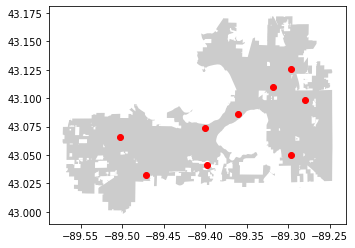

In [73]:
# part 5: static plot
ax = background.plot(color="0.8")
df.plot(ax=ax, color="red")

In [77]:
# part 6: animation
fig, ax = plt.subplots()

def draw_frame(frame_num):
    ax.cla()
    background.plot(ax=ax, color="0.8")
    sub_df = df[df["day"] <= frame_num]
    if len(sub_df) > 0:
        sub_df.plot(ax=ax, color="red")
        
anim = FuncAnimation(fig, draw_frame, frames=26, interval=250)
vid_html = anim.to_html5_video()
plt.close(fig)

HTML(vid_html)